In [15]:
import numpy as np
import geopandas
import rioxarray
import xarray as xr
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import numpy.ma as ma
import datetime

In [16]:
dataset = xr.open_dataset("./italiaecmwf.nc", decode_coords="all")[['tcco', 'gtco3', 'tcno2']]
dataset.rio.write_crs("epsg:4326", inplace=True)
shapefile = geopandas.read_file('./italy_shapefile/italy_shapefile.shp', crs="epsg:4326")
dataset

<xarray.Dataset>
Dimensions:      (time: 31, latitude: 15, longitude: 15)
Coordinates:
  * longitude    (longitude) float32 7.0 7.75 8.5 9.25 ... 15.25 16.0 16.75 17.5
  * latitude     (latitude) float32 46.5 45.75 45.0 44.25 ... 37.5 36.75 36.0
  * time         (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-01-31
    spatial_ref  int64 0
Data variables:
    tcco         (time, latitude, longitude) float32 ...
    gtco3        (time, latitude, longitude) float32 ...
    tcno2        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-14 10:41:43 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [17]:
dataset = dataset.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, drop=True)
daily_dataset = dataset.resample(time="1D", restore_coord_dims=True).sum(dim='time')

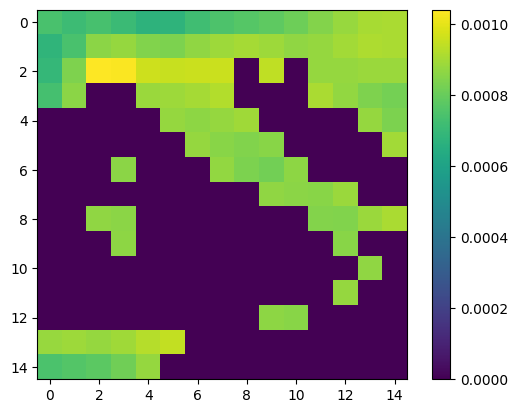

In [18]:
plt.imshow(daily_dataset.tcco[0])
plt.colorbar()

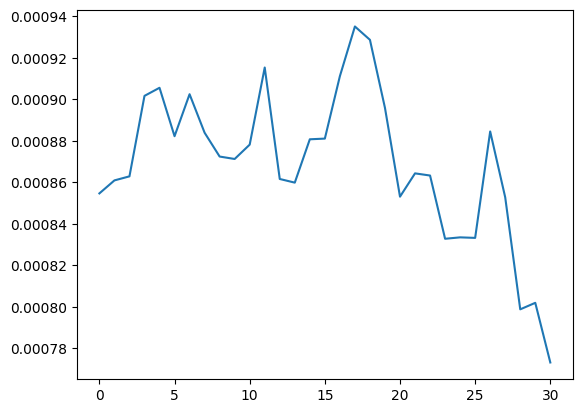

In [19]:
plt.plot(
    np.arange(0,31),
    daily_dataset.tcco.where(daily_dataset.tcco != 0).groupby("time").mean(dim=['longitude', 'latitude'])
)
plt.show()

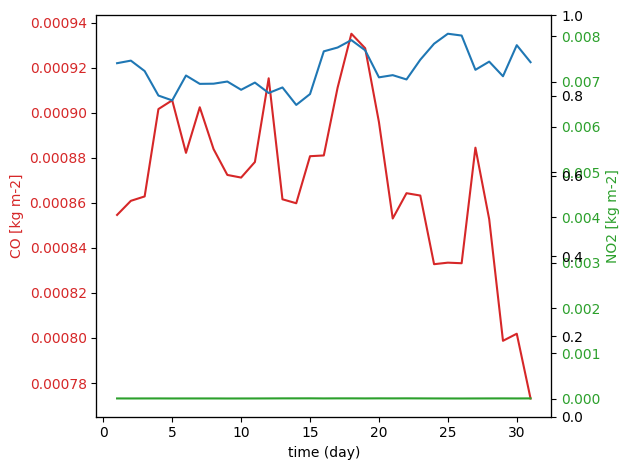

In [20]:
# Create some mock data
fig, ax1 = plt.subplots()
time = np.arange(1, 32)

color = 'tab:red'
ax1.set_xlabel('time (day)')
ax1.set_ylabel('CO [kg m-2]', color=color)
ax1.plot(time, daily_dataset.tcco.where(daily_dataset.tcco != 0).groupby("time").mean(dim=['longitude', 'latitude']), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('O3 [kg m-2]', color=color)  # we already handled the x-label with ax1
ax2.plot(time, daily_dataset.gtco3.where(daily_dataset.gtco3 != 0).groupby("time").mean(dim=['longitude', 'latitude']), color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('NO2 [kg m-2]', color=color)  # we already handled the x-label with ax1
ax2.plot(time, daily_dataset.tcno2.where(daily_dataset.tcno2 != 0).groupby("time").mean(dim=['longitude', 'latitude']), color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

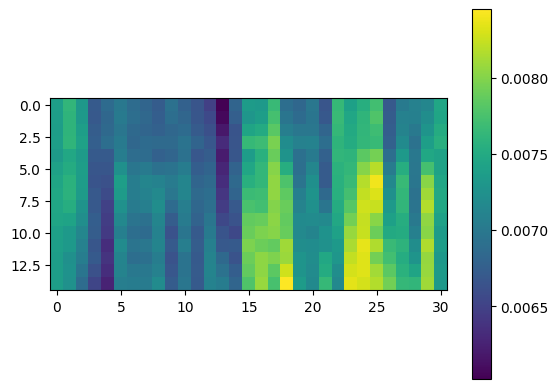

In [21]:
plt.imshow(dataset.gtco3.groupby("time").mean(dim='latitude').T.values)
plt.colorbar()
plt.show()